## IMPORT PACKAGES

In [ ]:
import atomap.api as am
import hyperspy.api as hs
from sklearn.preprocessing import StandardScaler
import numpy as np
import atomai as aoi
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import scipy.signal as signal
import torch
import sys
sys.path.append(os.path.abspath('..'))

## LOAD IMAGES

Parent image:


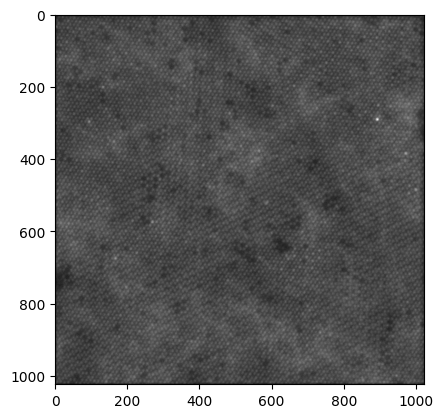

In [5]:
file = "../data/images//Mxene_24_A1_0050.jpg"
mother_image = Image.open(file).convert("L")  
plt.imshow(mother_image, cmap = "gray")

test image:

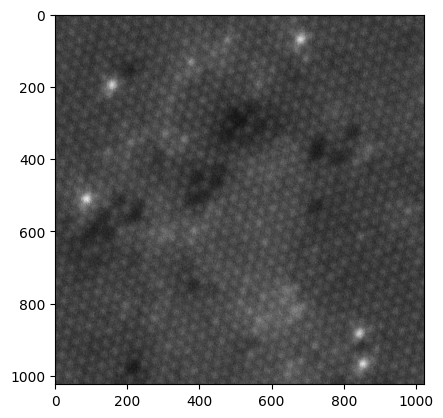

In [7]:
file = "../data/images//1255_240909_Ti3C2_5HF_17.5_Mx_STEM_HAADF.tif"
test_image = Image.open(file)
test_image_arr = np.array(test_image)
plt.imshow(test_image_arr, cmap = "gray")

## MAKE TRAINING DATASET


In [9]:
from functions import finetuning_training as utils

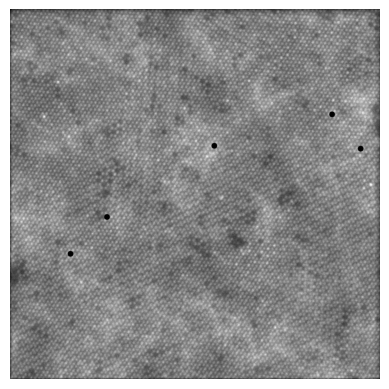

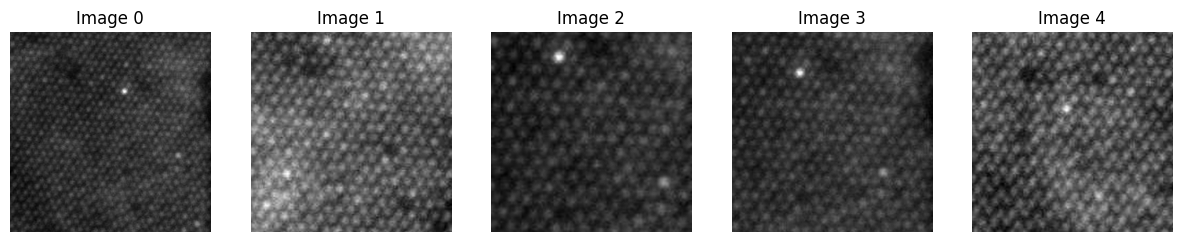

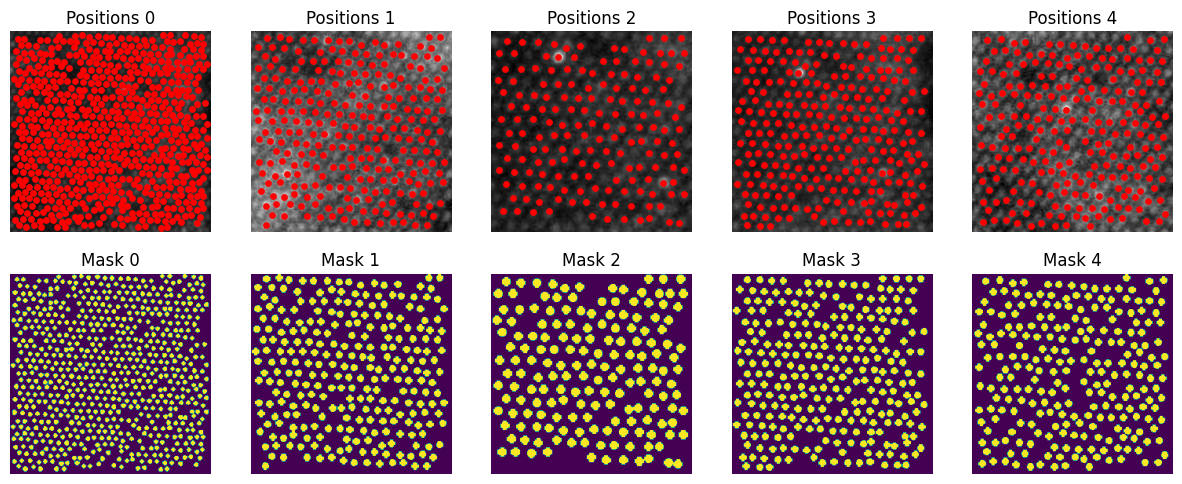

In [10]:
num_i = 1000
size_range1 = [150, 300]
images, labels, dfs = utils.create_training_data(
    image=mother_image,
    n_samples=num_i,
    min_distance=5,
    crop_dim=256,
    size_range=size_range1,
    scale=9,
    radius_mask=7,
    adatom=True,
    highlight_count=5,
    adatom_ratio = .5
)


## AUGMENTING

auglist = ["custom_transform", "zoom", "gauss_noise", "jitter",
               "poisson_noise", "contrast", "salt_and_pepper", "blur",
               "resize", "rotation", "background"]

In [11]:
from atomai.transforms import seg_augmentor

In [12]:
kwargs = {
    'rotation': True,
    'gauss_noise': [40, 60]}


torch_images = torch.tensor(images)
torch_labels = torch.tensor(labels)
aug_func = seg_augmentor(1, **kwargs)

In [13]:
etrainer = aoi.trainers.EnsembleTrainer("Unet")
etrainer.compile_ensemble_trainer(training_cycles=1000, batch_size = 15, compute_accuracy=True)

## ENSEMBLING

Training ensemble models (strategy = 'from_scratch')

Ensemble model 1
Epoch 1/1000 ... Training loss: 0.9359 ... Test loss: 0.6852 ... Train Accuracy: 0.3069 ... Test Accuracy: 0.4475 ... GPU memory usage: N/A / N/A
Epoch 100/1000 ... Training loss: 0.396 ... Test loss: 0.4021 ... Train Accuracy: 0.6679 ... Test Accuracy: 0.6621 ... GPU memory usage: N/A / N/A
Epoch 200/1000 ... Training loss: 0.3515 ... Test loss: 0.3622 ... Train Accuracy: 0.6796 ... Test Accuracy: 0.6648 ... GPU memory usage: N/A / N/A
Epoch 300/1000 ... Training loss: 0.3469 ... Test loss: 0.3853 ... Train Accuracy: 0.67 ... Test Accuracy: 0.627 ... GPU memory usage: N/A / N/A
Epoch 400/1000 ... Training loss: 0.316 ... Test loss: 0.3045 ... Train Accuracy: 0.702 ... Test Accuracy: 0.7136 ... GPU memory usage: N/A / N/A
Epoch 500/1000 ... Training loss: 0.2834 ... Test loss: 0.2771 ... Train Accuracy: 0.7315 ... Test Accuracy: 0.7361 ... GPU memory usage: N/A / N/A
Epoch 600/1000 ... Training loss: 0.2885 ... Test

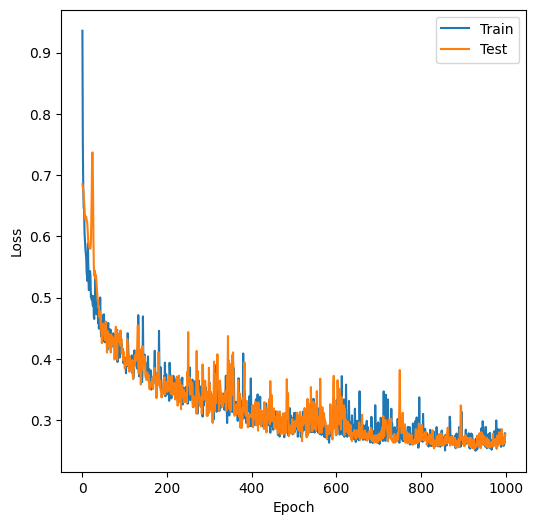


Ensemble model 2
Epoch 1/1000 ... Training loss: 0.8722 ... Test loss: 0.6861 ... Train Accuracy: 0.339 ... Test Accuracy: 0.3805 ... GPU memory usage: N/A / N/A
Epoch 100/1000 ... Training loss: 0.389 ... Test loss: 0.4169 ... Train Accuracy: 0.6746 ... Test Accuracy: 0.6417 ... GPU memory usage: N/A / N/A
Epoch 200/1000 ... Training loss: 0.3532 ... Test loss: 0.3546 ... Train Accuracy: 0.6706 ... Test Accuracy: 0.6713 ... GPU memory usage: N/A / N/A
Epoch 300/1000 ... Training loss: 0.3374 ... Test loss: 0.3617 ... Train Accuracy: 0.6757 ... Test Accuracy: 0.6476 ... GPU memory usage: N/A / N/A
Epoch 400/1000 ... Training loss: 0.3313 ... Test loss: 0.3165 ... Train Accuracy: 0.6929 ... Test Accuracy: 0.7043 ... GPU memory usage: N/A / N/A
Epoch 500/1000 ... Training loss: 0.2985 ... Test loss: 0.2999 ... Train Accuracy: 0.7179 ... Test Accuracy: 0.7192 ... GPU memory usage: N/A / N/A
Epoch 600/1000 ... Training loss: 0.2813 ... Test loss: 0.2696 ... Train Accuracy: 0.7313 ... Test

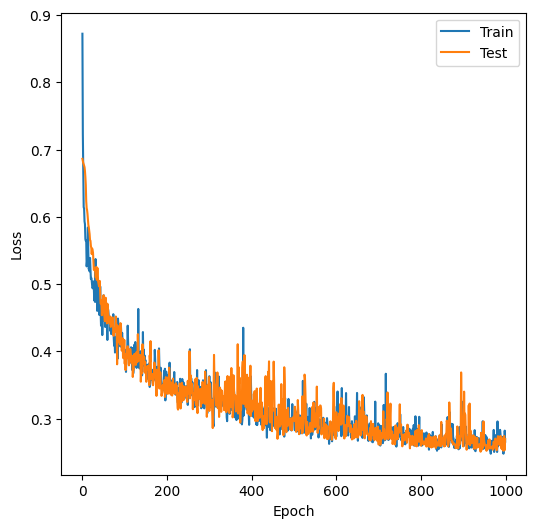


Ensemble model 3
Epoch 1/1000 ... Training loss: 1.0307 ... Test loss: 0.6887 ... Train Accuracy: 0.2899 ... Test Accuracy: 0.372 ... GPU memory usage: N/A / N/A
Epoch 100/1000 ... Training loss: 0.408 ... Test loss: 0.392 ... Train Accuracy: 0.6555 ... Test Accuracy: 0.6713 ... GPU memory usage: N/A / N/A
Epoch 200/1000 ... Training loss: 0.3641 ... Test loss: 0.3555 ... Train Accuracy: 0.6642 ... Test Accuracy: 0.6756 ... GPU memory usage: N/A / N/A
Epoch 300/1000 ... Training loss: 0.3322 ... Test loss: 0.3769 ... Train Accuracy: 0.6825 ... Test Accuracy: 0.6361 ... GPU memory usage: N/A / N/A
Epoch 400/1000 ... Training loss: 0.3216 ... Test loss: 0.3044 ... Train Accuracy: 0.6973 ... Test Accuracy: 0.7115 ... GPU memory usage: N/A / N/A
Epoch 500/1000 ... Training loss: 0.3106 ... Test loss: 0.3075 ... Train Accuracy: 0.7063 ... Test Accuracy: 0.7122 ... GPU memory usage: N/A / N/A
Epoch 600/1000 ... Training loss: 0.2888 ... Test loss: 0.3084 ... Train Accuracy: 0.7255 ... Test 

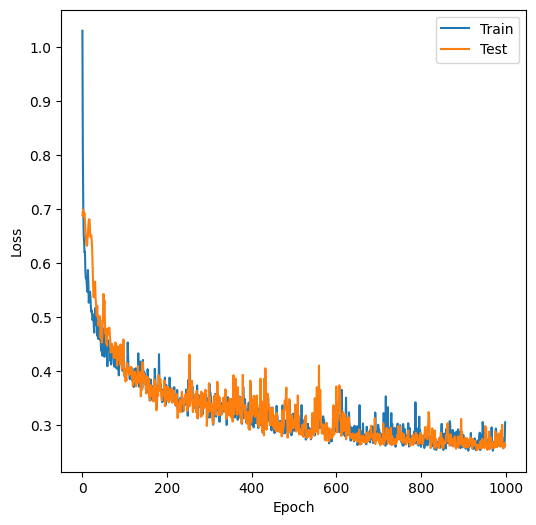

In [14]:
smodel, ensemble = etrainer.train_ensemble_from_scratch(
    images, labels, n_models=3, augment_fn= aug_func)


## OTHER

In [15]:
smodel.load_state_dict(ensemble[0])
smodel.eval()

Unet(
  (c1): ConvBlock(
    (block): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c2): ConvBlock(
    (block): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c3): ConvBlock(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

## EVALUATE MODEL SUCCESS

In [19]:
from atomai.predictors.predictor import Locator

predicting image 0
Batch 1/1

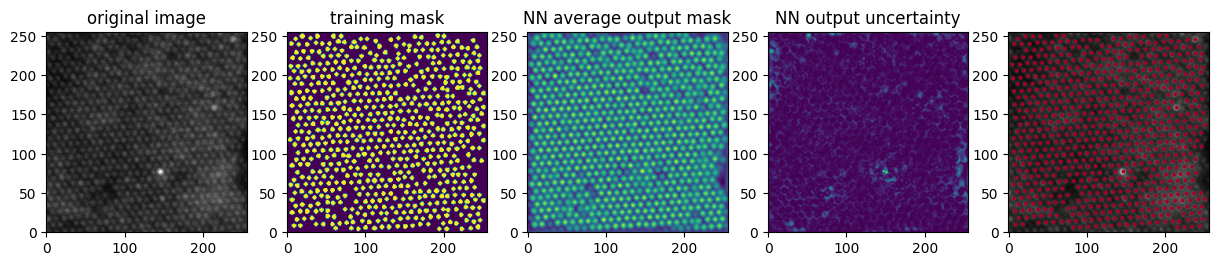

predicting image 1
Batch 1/1

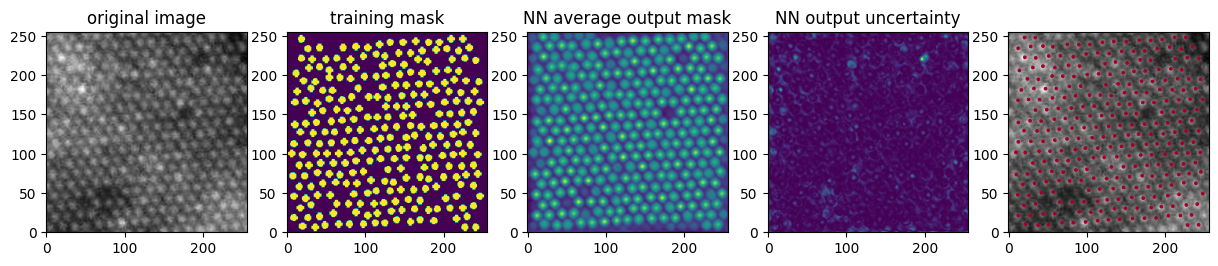

predicting image 2
Batch 1/1

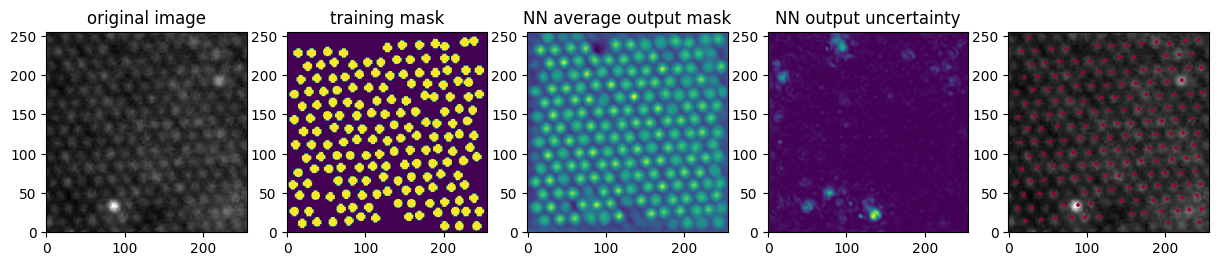

In [20]:
p = aoi.predictors.EnsemblePredictor(smodel, ensemble)
for i in range(0,3):
    print(f"predicting image {i}")
    img = images[i][0]
    nn_out_mean, nn_out_var = p.predict(img) 
    _, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
    ax1.imshow(img, cmap='gray', origin="lower")
    ax1.title.set_text("original image")
    ax2.imshow(labels[i][0], origin="lower")
    ax2.title.set_text("training mask")
    ax3.imshow(nn_out_mean.squeeze(), origin="lower")
    ax3.title.set_text("NN average output mask")
    ax4.imshow(nn_out_var.squeeze(), origin = "lower")
    ax4.title.set_text("NN output uncertainty")
    cmap_ = "RdYlGn"
    loc = Locator()
    coordinates = loc.run(nn_out_mean, img)
    y, x, c = coordinates[0].T
    ax5.imshow(img, cmap = 'gray', origin = 'lower')
    ax5.scatter(x, y, s = 3, c = c, cmap  = cmap_ )

    
    plt.show()

## view model performance on (unseen) experimental data

Batch 1/1

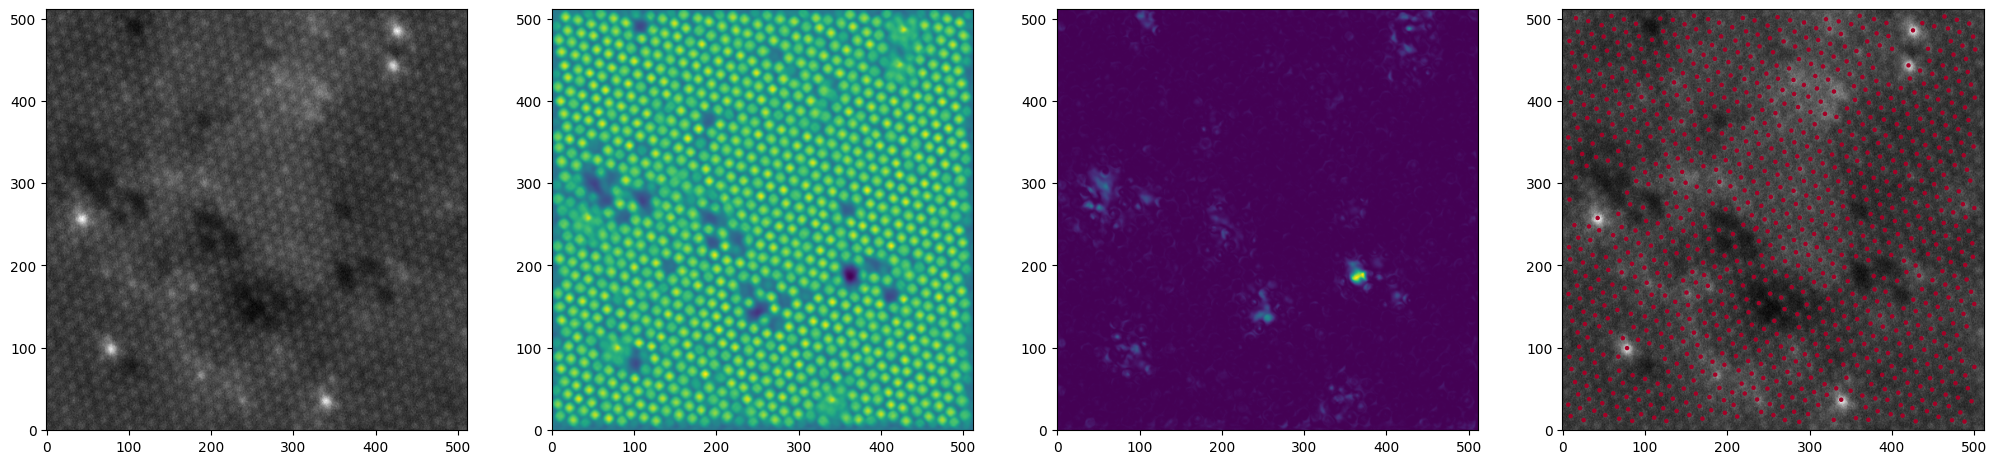

In [27]:
img = Image.open("../data/images/1255_240909_Ti3C2_5HF_17.5_Mx_STEM_HAADF.tif")
image_size = (512,512)
test_image2 = img.resize(image_size, Image.LANCZOS)
test_image2_arr = np.array(test_image2)
p = aoi.predictors.EnsemblePredictor(smodel, ensemble)
nn_out_mean, nn_out_var = p.predict(test_image2_arr)
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 12))
ax1.imshow(test_image2_arr, cmap='gray', origin="lower")
ax2.imshow(nn_out_mean.squeeze(), origin="lower")
ax3.imshow(nn_out_var.squeeze(), origin = "lower")

cmap_ = "RdYlGn"
loc = Locator(threshold= .5)
coordinates = loc.run(nn_out_mean, img)
y, x, c = coordinates[0].T
ax4.imshow(test_image2_arr, cmap = 'gray', origin = 'lower')
ax4.scatter(x, y, s = 5, c = c, cmap  = cmap_ )

save model, if you want.

In [25]:
smodel

Unet(
  (c1): ConvBlock(
    (block): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c2): ConvBlock(
    (block): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c3): ConvBlock(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [26]:
ensemble

{0: OrderedDict([('c1.block.0.weight',
               tensor([[[[-0.0843, -0.2471,  0.0787],
                         [-0.1405,  0.0895, -0.1657],
                         [ 0.0832, -0.0539, -0.0554]]],
               
               
                       [[[ 0.1247,  0.0906, -0.0080],
                         [ 0.0625,  0.1890,  0.0749],
                         [ 0.1746,  0.0589,  0.0307]]],
               
               
                       [[[ 0.0714,  0.1638,  0.1943],
                         [ 0.0096,  0.0494,  0.0704],
                         [-0.0780,  0.0388, -0.0308]]],
               
               
                       [[[ 0.1046,  0.2205,  0.1897],
                         [-0.0129, -0.0457,  0.1225],
                         [-0.0416,  0.0409,  0.1684]]],
               
               
                       [[[ 0.1749,  0.1136,  0.0702],
                         [-0.0979, -0.1669,  0.1783],
                         [-0.0133,  0.1876, -0.1658]]],
             

In [ ]:
torch.save({
    "smodel": smodel,
    "ensemble": ensemble 
}, "ensemble_3_models_1000.pt")
